In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import seaborn as sns

import sys
sys.path.append('../')
import RandomMatrix as RM


%matplotlib inline
sns.set()

np.random.seed(140)

# The Semicircle Distribution

The semicircle distribution of radius $r$ takes on values from $[-r, r]$ with density 

$$\sigma_r(x) = \frac{2}{\pi r^2} \sqrt{r^2 - x^2}$$

If one plots the density, it becomes apparent why this is called the semicircle distribution.

**Theorem** Suppose $X$ has the semicircle distribution with radius $r$ and $\alpha > 0 \in \mathbb{R}$, then $\alpha X$ has the semicircle distribution with radius $\alpha r$.

*Proof* Suppose $f(x)$ is the density of $\alpha X$, then by the linear transformation for density formula; 

$$f(x) = \frac{\sigma_r(\frac{x}{\alpha})}{\alpha} = \frac{2}{\pi r^2 \alpha} \sqrt{r^2 - (\frac{x}{\alpha})^2} = \frac{2}{\pi (\alpha r)^2} \sqrt{(\alpha r)^2 - x^2}$$

Thus $f = \sigma_{\alpha r}$

# Wigner's Semicircle Law

Suppose we are interested in the distribution of a single arbitrary (not necessarily the biggest or smallest) eigenvalue $\lambda_1$ of a Gaussian Ensemble with Dyson index $\beta$. 

$$ \rho(\lambda_1) = \int_{-\infty}^{\infty} \cdot \cdot \cdot \int_{-\infty}^{\infty} f(\lambda_1, \lambda_2,... \lambda_N) \ d\lambda_2 \cdot \cdot \cdot d\lambda_N  $$

Wigner's Semicricle Law studies the distribution of $\lambda_1$ as $N \longrightarrow \infty$

<hr>

**Wigner's Semicircle Law:** 

$$\lim_{N \longrightarrow \infty} \sqrt{\beta N} \rho(\sqrt{\beta N}\lambda_1) = \sigma_{\sqrt{2}}(\lambda_1)$$

<hr>

# Simulation of the Law

Note this implies that $\frac{\lambda_1}{\sqrt{\beta N}}$ tends to a semicircle distribution with radius $\sqrt{2}$ as $N$ gets large.

In [2]:
N = 1000
GOE_λs, _ = np.linalg.eigh(RM.Generate_GOE(N))
GOE_scaled_eigenvalues = GOE_λs/(np.sqrt(N))

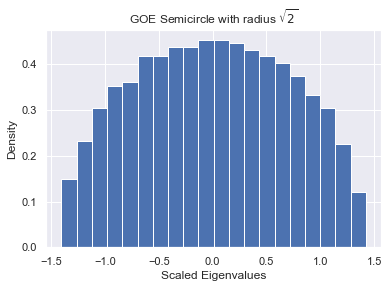

In [3]:
plt.ylabel("Density")
plt.xlabel("Scaled Eigenvalues")
plt.title("GOE Semicircle with radius $\sqrt{2}$")
plt.hist(GOE_scaled_eigenvalues, bins=20, density=True);

In [4]:
N = 1000
GUE_λs, _ = np.linalg.eigh(RM.Generate_GUE(N))
GUE_scaled_eigenvalues = GUE_λs/(np.sqrt(2*N))

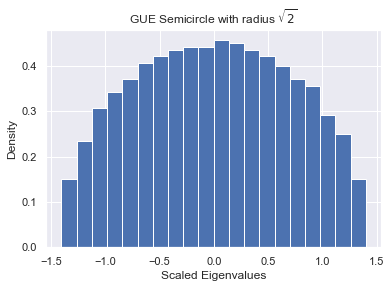

In [5]:
plt.ylabel("Density")
plt.xlabel("Scaled Eigenvalues")
plt.title("GUE Semicircle with radius $\sqrt{2}$")
plt.hist(GUE_scaled_eigenvalues, bins=20, density=True);

We may use the scaling theorem to converge to different radii. If we want the eigenvalues to converge to a semicircle with radius $r$ we scale as follows

$$\frac{r \lambda_1}{\sqrt{2 \beta N}}$$

Below we make the eigenvalues converge to the unit semicircle.

In [6]:
N = 1000
GOE_λs, _ = np.linalg.eigh(RM.Generate_GOE(N))
GOE_scaled_eigenvalues = GOE_λs/(np.sqrt(2*N))

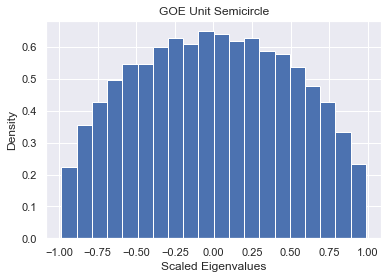

In [7]:
plt.ylabel("Density")
plt.xlabel("Scaled Eigenvalues")
plt.title("GOE Unit Semicircle")
plt.hist(GOE_scaled_eigenvalues, bins=20, density=True);

In [8]:
N = 1000
GUE_λs, _ = np.linalg.eigh(RM.Generate_GUE(N))
GUE_scaled_eigenvalues = GUE_λs/np.sqrt(4*N)

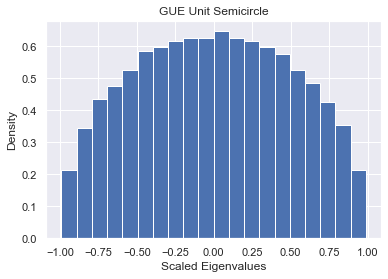

In [9]:
plt.ylabel("Density")
plt.xlabel("Scaled Eigenvalues")
plt.title("GUE Unit Semicircle")
plt.hist(GUE_scaled_eigenvalues, bins=20, density=True);

# Application of the Semicircle Law

Note that for a Gaussian Ensemble, $\frac{\lambda}{\sqrt{\beta N}}$ having the Semicircle($\sqrt{2}$) distribution implies $\lambda \sim $ Semicircle($\sqrt{2 \beta N}$). Below is a demonstration for $N=200$ and $\beta = 1$ and as expected we see a semicircle of radius 20.

In [10]:
trials = 1000
all_eigs = []
N = 200
for _ in range(trials):
    A = RM.Generate_GOE(N) 
    λs, V = np.linalg.eigh(A)
    all_eigs.extend(λs)

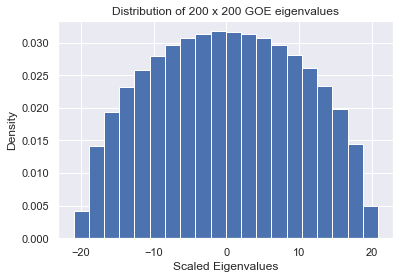

In [11]:
plt.ylabel("Density")
plt.xlabel("Scaled Eigenvalues")
plt.title("Distribution of 200 x 200 GOE eigenvalues")
plt.hist(all_eigs, bins=20, density=True);

Let $\Lambda_{N, \beta}[a;b]$ be the number of eigenvalues of an $N \times N$ Gaussian ensemble with Dyson index $\beta$. Then

$$ \lim_{N \rightarrow \infty} \Lambda_{N, \beta}[a;b] \overset{p}{\to} N \int_a^b \sigma_{\sqrt{2 \beta N}}(t) \ dt$$

where $\overset{p}{\to}$ denotes convergence in probability. We can find a closed form expression for the integral

In [12]:
t = symbols("t")
N, β = symbols("N β", positive=True)
σ = 2/(pi*(2*β*N)) * sqrt((2*β*N) - t**2)
Λ_N_β = integrate(N*σ, t)
Λ_N_β

(N*β*asin(sqrt(2)*t/(2*sqrt(N)*sqrt(β))) + t*sqrt(2*N*β - t**2)/2)/(pi*β)

Let's approximate $\Lambda_{200, 1}[10;15]$. 

In [13]:
Λ_200_1 = Λ_N_β.subs(N, 200).subs(β, 1)
Λ_200_1

(t*sqrt(400 - t**2)/2 + 200*asin(t/20))/pi

In [14]:
(Λ_200_1.subs(t, 15) - Λ_200_1.subs(t, 10)).evalf()

24.6708606141383

Let's check this approximation empirically

In [15]:
trials = 1000
in_range = []
matrix_size = 200
for _ in range(trials):
    A = RM.Generate_GOE(matrix_size) 
    λs, V = np.linalg.eigh(A)
    in_range.append(sum((10 < λs) & (λs < 15)))

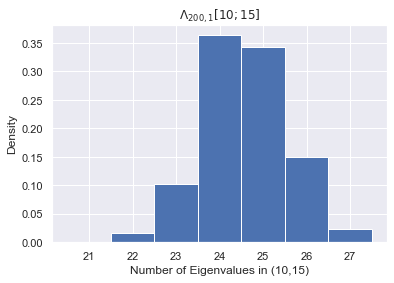

In [16]:
plt.ylabel("Density")
plt.xlabel("Number of Eigenvalues in (10,15)")
plt.title("$\Lambda_{200, 1}[10;15]$")
plt.hist(in_range, bins=np.array(list(set(in_range)))-0.5, density=True);

In [17]:
np.mean(in_range)

24.584

As we can see, $\Lambda_{N,1}[10;15]$ successfully predicts the number eigenvalues in $(10,15)$ with reasonable variance. We can likewise predict $\Lambda_{200, 2}[10;15]$

In [18]:
Λ_200_2 = Λ_N_β.subs(N, 200).subs(β, 2)
Λ_200_2

(t*sqrt(800 - t**2)/2 + 400*asin(sqrt(2)*t/40))/(2*pi)

In [19]:
(Λ_200_2.subs(t, 15) - Λ_200_2.subs(t, 10)).evalf()

20.1498455367282

In [20]:
trials = 1000
in_range = []
N = 200
for _ in range(trials):
    A = RM.Generate_GUE(N) 
    λs, V = np.linalg.eigh(A)
    in_range.append(sum((10 < λs) & (λs < 15)))

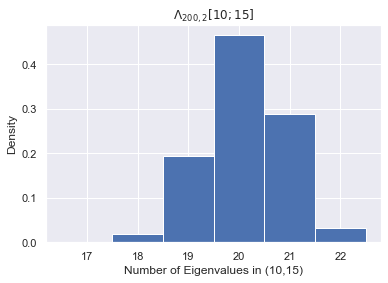

In [21]:
plt.ylabel("Density")
plt.xlabel("Number of Eigenvalues in (10,15)")
plt.title("$\Lambda_{200, 2}[10;15]$")
plt.hist(in_range, bins=np.array(list(set(in_range)))-0.5, density=True);

In [22]:
np.mean(in_range)

20.123